# Model RESNET18

In [1]:
import torch.nn as nn

class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()

        self.dropout_percentage = 0.5
        self.relu = nn.ReLU()

        # BLOCK-1 (starting block) input=(224x224) output=(112x112)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

        # BLOCK-2 (1) input=(112x112) output = (56x56)
        self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_1 = nn.BatchNorm2d(64)
        self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_2 = nn.BatchNorm2d(64)
        self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-2 (2)
        self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_1 = nn.BatchNorm2d(64)
        self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_2 = nn.BatchNorm2d(64)
        self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-3 (1) input=(56x56) output = (28x28)
        self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm3_1_1 = nn.BatchNorm2d(128)
        self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_1_2 = nn.BatchNorm2d(128)
        self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-3 (2)
        self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_1 = nn.BatchNorm2d(128)
        self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_2 = nn.BatchNorm2d(128)
        self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-4 (1) input=(28x28) output = (14x14)
        self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm4_1_1 = nn.BatchNorm2d(256)
        self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_1_2 = nn.BatchNorm2d(256)
        self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-4 (2)
        self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_1 = nn.BatchNorm2d(256)
        self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_2 = nn.BatchNorm2d(256)
        self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-5 (1) input=(14x14) output = (7x7)
        self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm5_1_1 = nn.BatchNorm2d(512)
        self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_1_2 = nn.BatchNorm2d(512)
        self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-5 (2)
        self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_1 = nn.BatchNorm2d(512)
        self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_2 = nn.BatchNorm2d(512)
        self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)

        # Final Block input=(7x7)
        self.avgpool = nn.AvgPool2d(kernel_size=(7, 7), stride=(1, 1))
        self.fc = nn.Linear(in_features=1 * 1 * 512, out_features=1000)
        self.out = nn.Linear(in_features=1000, out_features=num_classes)
        # END

    def forward(self, x):
        # block 1 --> Starting block
        x = self.relu(self.batchnorm1(self.conv1(x)))
        op1 = self.maxpool1(x)

        # block2 - 1
        x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))  # conv2_1
        x = self.batchnorm2_1_2(self.conv2_1_2(x))  # conv2_1
        x = self.dropout2_1(x)
        # block2 - Adjust - No adjust in this layer as dimensions are already same
        # block2 - Concatenate 1
        op2_1 = self.relu(x + op1)
        # block2 - 2
        x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2
        x = self.batchnorm2_2_2(self.conv2_2_2(x))  # conv2_2
        x = self.dropout2_2(x)
        # op - block2
        op2 = self.relu(x + op2_1)

        # block3 - 1[Convolution block]
        x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))  # conv3_1
        x = self.batchnorm3_1_2(self.conv3_1_2(x))  # conv3_1
        x = self.dropout3_1(x)
        # block3 - Adjust
        op2 = self.concat_adjust_3(op2)  # SKIP CONNECTION
        # block3 - Concatenate 1
        op3_1 = self.relu(x + op2)
        # block3 - 2[Identity Block]
        x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
        x = self.batchnorm3_2_2(self.conv3_2_2(x))  # conv3_2
        x = self.dropout3_2(x)
        # op - block3
        op3 = self.relu(x + op3_1)

        # block4 - 1[Convolition block]
        x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))  # conv4_1
        x = self.batchnorm4_1_2(self.conv4_1_2(x))  # conv4_1
        x = self.dropout4_1(x)
        # block4 - Adjust
        op3 = self.concat_adjust_4(op3)  # SKIP CONNECTION
        # block4 - Concatenate 1
        op4_1 = self.relu(x + op3)
        # block4 - 2[Identity Block]
        x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
        x = self.batchnorm4_2_2(self.conv4_2_2(x))  # conv4_2
        x = self.dropout4_2(x)
        # op - block4
        op4 = self.relu(x + op4_1)

        # block5 - 1[Convolution Block]
        x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))  # conv5_1
        x = self.batchnorm5_1_2(self.conv5_1_2(x))  # conv5_1
        x = self.dropout5_1(x)
        # block5 - Adjust
        op4 = self.concat_adjust_5(op4)  # SKIP CONNECTION
        # block5 - Concatenate 1
        op5_1 = self.relu(x + op4)
        # block5 - 2[Identity Block]
        x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
        x = self.batchnorm5_2_1(self.conv5_2_1(x))  # conv5_2
        x = self.dropout5_2(x)
        # op - block5
        op5 = self.relu(x + op5_1)

        # FINAL BLOCK - classifier
        x = self.avgpool(op5)
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc(x))
        x = self.out(x)

        return x

# Resnet18 trainning

In [2]:
# """
# Thanh Le  16 April 2024
# How to train/fine-tune a pre-trained model on a custom dataset (i.e., transfer learning)
# """
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Setup CUDA
# def setup_cuda():
#     # Setting seeds for reproducibility
#     seed = 50
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)

#     return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


# def train_model():
#     """
#     Train the model over a single epoch
#     :return: training loss and training accuracy
#     """
#     train_loss = 0.0
#     train_acc = 0.0
#     model.train()

#     for (img, label) in tqdm(train_loader, ncols=80, desc='Training'):
#         # Get a batch
#         img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

#         # Set the gradients to zero before starting backpropagation
#         optimizer.zero_grad()

#         # Perform a feed-forward pass
#         logits = model(img)

#         # Compute the batch loss
#         loss = loss_fn(logits, label)

#         # Compute gradient of the loss fn w.r.t the trainable weights
#         loss.backward()

#         # Update the trainable weights
#         optimizer.step()

#         # Accumulate the batch loss
#         train_loss += loss.item()

#         # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
#         prediction = logits.argmax(axis=1)
#         train_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

#     return train_loss / len(train_loader), train_acc / len(train_loader)


# def validate_model():
#     """
#     Validate the model over a single epoch
#     :return: validation loss and validation accuracy
#     """
#     model.eval()
#     valid_loss = 0.0
#     val_acc = 0.0

#     with torch.no_grad():
#         for (img, label) in tqdm(val_loader, ncols=80, desc='Valid'):
#             # Get a batch
#             img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

#             # Perform a feed-forward pass
#             logits = model(img)

#             # Compute the batch loss
#             loss = loss_fn(logits, label)

#             # Accumulate the batch loss
#             valid_loss += loss.item()

#             # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
#             prediction = logits.argmax(axis=1)
#             val_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

#     return valid_loss / len(val_loader), val_acc / len(val_loader)


# # Example plotting function

# def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
#     epochs = range(1, len(train_losses) + 1)
#     # Losses
#     plt.figure(figsize=(15, 7))
#     plt.subplot(2, 1, 1)
#     plt.plot(epochs, train_losses, label='Training Loss', color='blue')
#     plt.plot(epochs, val_losses, label='Validation Loss', color='red')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('Training and Validation Loss')
#     plt.legend()
#     plt.yscale('log')  # Log scale can help for loss curves with large values

#     # Accuracies
#     plt.subplot(2, 1, 2)
#     plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
#     plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.legend()

#     plt.tight_layout()
#     # Save the figure to a file
#     plt.savefig("trainplot.png")  # You can change the file name and format (e.g., .png, .jpg, .pdf)

#     plt.show()


# if __name__ == "__main__":
#     device = setup_cuda()

#     # 1. Load the dataset
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     val_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/val', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Create data loaders
#     train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

#     # 3. Create a new deep model without pre-trained weights
#     # from utils.seresnet18 import ResNet18
#     model = ResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     # 4. Specify loss function and optimizer
#     optimizer = Adam(model.parameters(), lr=1e-4)
#     loss_fn = torch.nn.CrossEntropyLoss()

#     # 5. Train the model with 100 epochs
#     # store the metrics for plotting
#     train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

#     max_acc = 0
#     for epoch in range(100):

#         # 5.1. Train the model over a single epoch
#         train_loss, train_acc = train_model()
#         train_losses.append(train_loss)     # save train loss values
#         train_accuracies.append(train_acc)  # save train acc values

#         # 5.2. Validate the model after training
#         val_loss, val_acc = validate_model()
#         val_losses.append(val_loss)         # save val loss values
#         val_accuracies.append(val_acc)      # save val acc values

#         print(f'Epoch {epoch}: Train loss = {train_loss}, Train accuracy: {train_acc}')
#         print(f'Epoch {epoch}: Validation loss = {val_loss}, Validation accuracy: {val_acc}')

#         # 4.3. Save the model if the validation accuracy is increasing
#         if val_acc > max_acc:
#             print(f'Validation accuracy increased ({max_acc} --> {val_acc}). Model saved')
#             folder_path = 'checkpoints_resnet18'  # Define the folder name
#             if not os.path.exists(folder_path):
#                 os.makedirs(folder_path)  # Create the folder if it does not exist
#             file_path = os.path.join(folder_path,
#                                      'resnet18_epoch_' + str(epoch) + '_acc_{0:.4f}'.format(val_acc) + '.pt')
#             with open(file_path, 'wb') as f:
#                 save(model.state_dict(), f)
#             max_acc = val_acc

# # After training is complete, plot the metrics
# plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Testing for Resnet18

In [3]:
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Thiết lập biến cần thiết
# train_dir = '/kaggle/input/dataset-split/dataset_split/train'
# test_dir = '/kaggle/input/dataset-split/dataset_split/test'
# valid_dir = '/kaggle/input/dataset-split/dataset_split/val'
# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32
# IMG_SIZE = 224
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])
# patch_size = 16
# CLASS = {} # KHONG CAN


# # Thiết lập thiết bị (GPU hoặc CPU)
# def setup_cuda():
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#     return device


# device = setup_cuda()

# # Thiết lập các transform để xử lý ảnh
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])


# # Hàm dự đoán kết quả cho một hình ảnh
# def predict_image(image_path, model, transform, class_names, device):
#     model.eval()
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = transform(img).unsqueeze(0).to(device)
#     with torch.no_grad():
#         output = model(img_tensor)
#         _, predicted_class = torch.max(output, 1)
#     predicted_label = class_names[predicted_class.item()]
#     return img, predicted_label


# # Hàm chính để dự đoán các hình ảnh trong tập test
# def test_model():
#     # 1. Tải dữ liệu và lớp từ tập train
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     test_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/test', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Tạo mô hình ViT và tải trạng thái từ checkpoint
#     # from utils.resnet18 import ResNet18

#     model = ResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     folder_checkpoint = 'checkpoints_resnet18'  # Define the folder name
#     file_name = '/kaggle/input/resnet-train-acc/ResNet/resnet18_epoch_10_acc_0.7310.pt' #best weight
#     file_checkpoint = os.path.join(folder_checkpoint, file_name)  # lay best weight
#     model.load_state_dict(torch.load(file_checkpoint, device))
#     print('Model loaded from checkpoint.')
#     # Ensure the output directory exists
#     output_dir = "output_resnet18"
#     os.makedirs(output_dir, exist_ok=True)

#     # 3. Dự đoán kết quả cho mỗi hình ảnh trong tập test
#     for image_path in tqdm(test_dataset.imgs, desc='Testing'):
#         img, predicted_label = predict_image(image_path[0], model, manual_transforms, class_names, device)
#         # plt.imshow(img)
#         # plt.title(f'Predicted: {predicted_label}')
#         # plt.show()

#         # Convert the tensor image back to a PIL image if necessary
#         if isinstance(img, torch.Tensor):
#             img = transforms.ToPILImage()(img)

#         # Create a plot
#         fig, ax = plt.subplots()

#         # Set white background
#         fig.patch.set_facecolor('white')
#         ax.set_facecolor('white')

#         # Remove axis
#         ax.axis('off')

#         # Display the image
#         ax.imshow(img)

#         # Add the predicted label as the title
#         ax.set_title(f'Predicted: {predicted_label}', fontsize=12, pad=10)

#         # Save the figure
#         image_basename = os.path.basename(image_path[0])
#         image_name, image_ext = os.path.splitext(image_basename)
#         output_image_path = os.path.join(output_dir, f"{image_name}_pred_{predicted_label}.png")

#         plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
#         plt.close(fig)


# if __name__ == '__main__':
#     test_model()


# SEBLOCK

In [4]:
import torch.nn as nn

class SE_Block(nn.Module):
    def __init__(self, c, r=16):
        super(SE_Block, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(c, c // r, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(c // r, c, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        bs, c, _, _ = x.size()
        y = self.squeeze(x).view(bs, c)
        y = self.excitation(y).view(bs, c, 1, 1)
        return x * y.expand_as(x)

# SEBLOCK + Resnet18

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SEBlock(nn.Module):
    def __init__(self, input_channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(input_channels, input_channels // reduction_ratio, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(input_channels // reduction_ratio, input_channels, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size, channels, _, _ = x.size()
        y = self.avg_pool(x).view(batch_size, channels)
        y = self.fc1(y)
        y = self.relu(y)
        y = self.fc2(y)
        y = self.sigmoid(y).view(batch_size, channels, 1, 1)
        return x * y.expand_as(x)


class SEResNet18(nn.Module):
    def __init__(self, num_classes):
        super(SEResNet18, self).__init__()

        self.dropout_percentage = 0.5
        self.relu = nn.ReLU()

        # BLOCK-1 (starting block) input=(224x224) output=(56x56)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

        # BLOCK-2 (1) input=(56x56) output = (56x56)
        self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_1 = nn.BatchNorm2d(64)
        self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_2 = nn.BatchNorm2d(64)
        self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)
        self.se2_1 = SEBlock(64)

        # BLOCK-2 (2)
        self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_1 = nn.BatchNorm2d(64)
        self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_2 = nn.BatchNorm2d(64)
        self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)
        self.se2_2 = SEBlock(64)

        # BLOCK-3 (1) input=(56x56) output = (28x28)
        self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm3_1_1 = nn.BatchNorm2d(128)
        self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_1_2 = nn.BatchNorm2d(128)
        self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
        self.se3_1 = SEBlock(128)

        # BLOCK-3 (2)
        self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_1 = nn.BatchNorm2d(128)
        self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_2 = nn.BatchNorm2d(128)
        self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)
        self.se3_2 = SEBlock(128)

        # BLOCK-4 (1) input=(28x28) output = (14x14)
        self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm4_1_1 = nn.BatchNorm2d(256)
        self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_1_2 = nn.BatchNorm2d(256)
        self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)
        self.se4_1 = SEBlock(256)

        # BLOCK-4 (2)
        self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_1 = nn.BatchNorm2d(256)
        self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_2 = nn.BatchNorm2d(256)
        self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)
        self.se4_2 = SEBlock(256)

        # BLOCK-5 (1) input=(14x14) output = (7x7)
        self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm5_1_1 = nn.BatchNorm2d(512)
        self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_1_2 = nn.BatchNorm2d(512)
        self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
        self.se5_1 = SEBlock(512)

        # BLOCK-5 (2)
        self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_1 = nn.BatchNorm2d(512)
        self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_2 = nn.BatchNorm2d(512)
        self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)
        self.se5_2 = SEBlock(512)

        # Final Block input=(7x7)
        self.avgpool = nn.AvgPool2d(kernel_size=(7, 7), stride=(1, 1))
        self.fc = nn.Linear(in_features=1 * 1 * 512, out_features=1000)
        self.out = nn.Linear(in_features=1000, out_features=num_classes)
        # END

    def forward(self, x):
        # block 1 --> Starting block
        x = self.relu(self.batchnorm1(self.conv1(x)))
        op1 = self.maxpool1(x)

        # block2 - 1
        x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))  # conv2_1
        x = self.batchnorm2_1_2(self.conv2_1_2(x))  # conv2_1
        x = self.dropout2_1(x)
        x = self.se2_1(x)
        # block2 - Adjust - No adjust in this layer as dimensions are already same
        # block2 - Concatenate 1
        op2_1 = self.relu(x + op1)
        # block2 - 2
        x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2
        x = self.batchnorm2_2_2(self.conv2_2_2(x))  # conv2_2
        x = self.dropout2_2(x)
        x = self.se2_2(x)
        # op - block2
        op2 = self.relu(x + op2_1)

        # block3 - 1[Convolution block]
        x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))  # conv3_1
        x = self.batchnorm3_1_2(self.conv3_1_2(x))  # conv3_1
        x = self.dropout3_1(x)
        x = self.se3_1(x)
        # block3 - Adjust
        op2 = self.concat_adjust_3(op2)  # SKIP CONNECTION
        # block3 - Concatenate 1
        op3_1 = self.relu(x + op2)
        # block3 - 2[Identity Block]
        x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
        x = self.batchnorm3_2_2(self.conv3_2_2(x))  # conv3_2
        x = self.dropout3_2(x)
        x = self.se3_2(x)
        # op - block3
        op3 = self.relu(x + op3_1)

        # block4 - 1[Convolition block]
        x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))  # conv4_1
        x = self.batchnorm4_1_2(self.conv4_1_2(x))  # conv4_1
        x = self.dropout4_1(x)
        x = self.se4_1(x)
        # block4 - Adjust
        op3 = self.concat_adjust_4(op3)  # SKIP CONNECTION
        # block4 - Concatenate 1
        op4_1 = self.relu(x + op3)
        # block4 - 2[Identity Block]
        x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
        x = self.batchnorm4_2_2(self.conv4_2_2(x))  # conv4_2
        x = self.dropout4_2(x)
        x = self.se4_2(x)
        # op - block4
        op4 = self.relu(x + op4_1)

        # block5 - 1[Convolution Block]
        x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))  # conv5_1
        x = self.batchnorm5_1_2(self.conv5_1_2(x))  # conv5_1
        x = self.dropout5_1(x)
        x = self.se5_1(x)
        # block5 - Adjust
        op4 = self.concat_adjust_5(op4)  # SKIP CONNECTION
        # block5 - Concatenate 1
        op5_1 = self.relu(x + op4)
        # block5 - 2[Identity Block]
        x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
        x = self.batchnorm5_2_2(self.conv5_2_1(x))  # conv5_2
        x = self.dropout5_2(x)
        x = self.se5_2(x)
        # op - block5
        op5 = self.relu(x + op5_1)

        # FINAL BLOCK - classifier
        x = self.avgpool(op5)
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc(x))
        x = self.out(x)

        return x


# Train SEBLock

Training:   9%|██▊                             | 81/925 [00:39<06:14,  2.25it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Valid: 100%|██████████████████████████████████| 132/132 [00:50<00:00,  2.60it/s]


Epoch 0: Train loss = 1.6270333226951392, Train accuracy: 0.3739207448790202
Epoch 0: Validation loss = 1.4006815882343235, Validation accuracy: 0.4697840914807536
Validation accuracy increased (0 --> 0.4697840914807536). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.11it/s]


Epoch 1: Train loss = 1.2798717317065678, Train accuracy: 0.5122083545697702
Epoch 1: Validation loss = 1.5456087801492575, Validation accuracy: 0.4489321724483461


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.06it/s]


Epoch 2: Train loss = 1.0863087532326983, Train accuracy: 0.5881349845029212
Epoch 2: Validation loss = 1.0580843524499373, Validation accuracy: 0.6009338439413996
Validation accuracy increased (0.4697840914807536 --> 0.6009338439413996). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.90it/s]


Epoch 3: Train loss = 0.9400623954953374, Train accuracy: 0.6505727417726774
Epoch 3: Validation loss = 1.1849697214184385, Validation accuracy: 0.5651428843989517


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.75it/s]


Epoch 4: Train loss = 0.8376955457313641, Train accuracy: 0.6785451214055758
Epoch 4: Validation loss = 0.9615519509622545, Validation accuracy: 0.6516042464610302
Validation accuracy increased (0.6009338439413996 --> 0.6516042464610302). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.67it/s]


Epoch 5: Train loss = 0.740975419186257, Train accuracy: 0.7158537896259412
Epoch 5: Validation loss = 0.8546224385499954, Validation accuracy: 0.6875963723569205
Validation accuracy increased (0.6516042464610302 --> 0.6875963723569205). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:34<00:00,  3.82it/s]


Epoch 6: Train loss = 0.6662152726102519, Train accuracy: 0.7440338447287276
Epoch 6: Validation loss = 0.826197226164919, Validation accuracy: 0.7068391927715504
Validation accuracy increased (0.6875963723569205 --> 0.7068391927715504). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:30<00:00,  4.31it/s]


Epoch 7: Train loss = 0.5997732498355814, Train accuracy: 0.7646593352910634
Epoch 7: Validation loss = 0.9083102275476311, Validation accuracy: 0.664051163602959


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.09it/s]


Epoch 8: Train loss = 0.5472531898762729, Train accuracy: 0.7885248071760744
Epoch 8: Validation loss = 0.7072733575195977, Validation accuracy: 0.7231640917333689
Validation accuracy increased (0.7068391927715504 --> 0.7231640917333689). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.68it/s]


Epoch 9: Train loss = 0.4949254058502816, Train accuracy: 0.8062884371667295
Epoch 9: Validation loss = 0.6288874201250799, Validation accuracy: 0.769520464720148
Validation accuracy increased (0.7231640917333689 --> 0.769520464720148). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 10: Train loss = 0.45590913936898514, Train accuracy: 0.8229651384418075
Epoch 10: Validation loss = 0.6143938321055789, Validation accuracy: 0.7518018547332648


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.06it/s]


Epoch 11: Train loss = 0.4141093023886552, Train accuracy: 0.8359730424752106
Epoch 11: Validation loss = 0.6249206030007565, Validation accuracy: 0.7623504892443166


Valid: 100%|██████████████████████████████████| 132/132 [00:44<00:00,  2.99it/s]


Epoch 12: Train loss = 0.38699486715568077, Train accuracy: 0.8398402508851645
Epoch 12: Validation loss = 0.6404036029495976, Validation accuracy: 0.7756612413760388
Validation accuracy increased (0.769520464720148 --> 0.7756612413760388). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.61it/s]


Epoch 13: Train loss = 0.3447569009581128, Train accuracy: 0.8601073865632753
Epoch 13: Validation loss = 0.5437850709440131, Validation accuracy: 0.7926702092994343
Validation accuracy increased (0.7756612413760388 --> 0.7926702092994343). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 14: Train loss = 0.31790765587139774, Train accuracy: 0.8739494804433874
Epoch 14: Validation loss = 0.6304648581779364, Validation accuracy: 0.7768264187104774


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 15: Train loss = 0.2907678289409425, Train accuracy: 0.8802988600408709
Epoch 15: Validation loss = 0.5077103268580906, Validation accuracy: 0.8074380780259768
Validation accuracy increased (0.7926702092994343 --> 0.8074380780259768). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.88it/s]


Epoch 16: Train loss = 0.27011785385576453, Train accuracy: 0.8869130570179707
Epoch 16: Validation loss = 0.6448814993103346, Validation accuracy: 0.7821779219490109


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.05it/s]


Epoch 17: Train loss = 0.24670995255781186, Train accuracy: 0.892226594589852
Epoch 17: Validation loss = 0.5429048031342752, Validation accuracy: 0.8093078438982819
Validation accuracy increased (0.8074380780259768 --> 0.8093078438982819). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 18: Train loss = 0.22703766777104623, Train accuracy: 0.9062627666705364
Epoch 18: Validation loss = 0.8382943744460741, Validation accuracy: 0.7055203792723742


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 19: Train loss = 0.21586550038207222, Train accuracy: 0.9064261622042269
Epoch 19: Validation loss = 0.603219685003613, Validation accuracy: 0.7922026654987624


Valid: 100%|██████████████████████████████████| 132/132 [00:46<00:00,  2.81it/s]


Epoch 20: Train loss = 0.1969277127741559, Train accuracy: 0.917874824291951
Epoch 20: Validation loss = 0.5426704035789678, Validation accuracy: 0.8142838633873246
Validation accuracy increased (0.8093078438982819 --> 0.8142838633873246). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.05it/s]


Epoch 21: Train loss = 0.18376458759545475, Train accuracy: 0.9209648184518556
Epoch 21: Validation loss = 0.655808719834595, Validation accuracy: 0.7859364729939085


Valid: 100%|██████████████████████████████████| 132/132 [00:34<00:00,  3.85it/s]


Epoch 22: Train loss = 0.17743910452501999, Train accuracy: 0.9239391054333868
Epoch 22: Validation loss = 0.7046277026335398, Validation accuracy: 0.7386117760430683


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.14it/s]


Epoch 23: Train loss = 0.16320369844652108, Train accuracy: 0.9299701645567611
Epoch 23: Validation loss = 0.5861651382098595, Validation accuracy: 0.7839393611207153


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 24: Train loss = 0.15411850410035333, Train accuracy: 0.9355438956054482
Epoch 24: Validation loss = 0.5686131553216414, Validation accuracy: 0.8123691082000732


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.98it/s]


Epoch 25: Train loss = 0.14259291004943284, Train accuracy: 0.9404430184493193
Epoch 25: Validation loss = 0.5255788261014404, Validation accuracy: 0.8082249620647142


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.03it/s]


Epoch 26: Train loss = 0.13639169853079963, Train accuracy: 0.9399367287352278
Epoch 26: Validation loss = 0.678626974536614, Validation accuracy: 0.7689207272999214


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.08it/s]


Epoch 27: Train loss = 0.12493429432799284, Train accuracy: 0.9477668985160621
Epoch 27: Validation loss = 0.5966566129390037, Validation accuracy: 0.7884409405065306


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.00it/s]


Epoch 28: Train loss = 0.12167988796038805, Train accuracy: 0.9468708026731336
Epoch 28: Validation loss = 0.6105162216293992, Validation accuracy: 0.7940518905719122


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.09it/s]


Epoch 29: Train loss = 0.10963798639540737, Train accuracy: 0.9494855576592522
Epoch 29: Validation loss = 0.6044825782265627, Validation accuracy: 0.8029108386148106


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 30: Train loss = 0.11014143637054273, Train accuracy: 0.953295749200357
Epoch 30: Validation loss = 0.6096455247677637, Validation accuracy: 0.7973433168548526


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.75it/s]


Epoch 31: Train loss = 0.10459559811757424, Train accuracy: 0.9532820371679358
Epoch 31: Validation loss = 0.5593640875974388, Validation accuracy: 0.8121125549077988


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.17it/s]


Epoch 32: Train loss = 0.10210989478824509, Train accuracy: 0.955119220823855
Epoch 32: Validation loss = 0.5266899266139125, Validation accuracy: 0.8048687663042184


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.01it/s]


Epoch 33: Train loss = 0.09550693039102731, Train accuracy: 0.9574057640900483
Epoch 33: Validation loss = 0.620588720973694, Validation accuracy: 0.7952170213966658


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.19it/s]


Epoch 34: Train loss = 0.09412635514235779, Train accuracy: 0.9609223309078732
Epoch 34: Validation loss = 0.5086975193046259, Validation accuracy: 0.8258512530362967
Validation accuracy increased (0.8142838633873246 --> 0.8258512530362967). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.03it/s]


Epoch 35: Train loss = 0.08543987201476419, Train accuracy: 0.9621178715937846
Epoch 35: Validation loss = 0.5275020905855027, Validation accuracy: 0.8160820124727307


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.89it/s]


Epoch 36: Train loss = 0.08552304289530258, Train accuracy: 0.9643682168625497
Epoch 36: Validation loss = 0.652318474413319, Validation accuracy: 0.8055164457270594


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.07it/s]


Epoch 37: Train loss = 0.07987078474582852, Train accuracy: 0.9649997017834637
Epoch 37: Validation loss = 0.5722998474922144, Validation accuracy: 0.8134638929005825


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.03it/s]


Epoch 38: Train loss = 0.08244213135032033, Train accuracy: 0.9655876445770264
Epoch 38: Validation loss = 0.5826726565984163, Validation accuracy: 0.8042852846962033


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.00it/s]


Epoch 39: Train loss = 0.0743152618836108, Train accuracy: 0.9692287178297301
Epoch 39: Validation loss = 0.5898887638679959, Validation accuracy: 0.7949843754371008


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.55it/s]


Epoch 40: Train loss = 0.07398451746026104, Train accuracy: 0.9686540348465378
Epoch 40: Validation loss = 0.585465840092211, Validation accuracy: 0.8146418798150439


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.13it/s]


Epoch 41: Train loss = 0.07149732966089269, Train accuracy: 0.9670369066418828
Epoch 41: Validation loss = 0.6779237765480172, Validation accuracy: 0.7960496580961979


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.08it/s]


Epoch 42: Train loss = 0.07191171301818276, Train accuracy: 0.9693869691281706
Epoch 42: Validation loss = 0.608341712053075, Validation accuracy: 0.7900606407360597


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 43: Train loss = 0.06418762873335918, Train accuracy: 0.9718335766405672
Epoch 43: Validation loss = 0.6787429534068162, Validation accuracy: 0.8011130473830483


Valid: 100%|██████████████████████████████████| 132/132 [00:31<00:00,  4.24it/s]


Epoch 44: Train loss = 0.06190615956451291, Train accuracy: 0.9710227535222028
Epoch 44: Validation loss = 0.5984981370468935, Validation accuracy: 0.7987600817824855


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.02it/s]


Epoch 45: Train loss = 0.06519701238847464, Train accuracy: 0.973249482464146
Epoch 45: Validation loss = 0.6522297994374777, Validation accuracy: 0.7859926185373104


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.77it/s]


Epoch 46: Train loss = 0.059475468551280684, Train accuracy: 0.9759413702423508
Epoch 46: Validation loss = 0.6103502969737306, Validation accuracy: 0.7817628550710101


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.99it/s]


Epoch 47: Train loss = 0.05865554388269555, Train accuracy: 0.9731528909141953
Epoch 47: Validation loss = 0.5064400215492104, Validation accuracy: 0.8249326741153543


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.93it/s]


Epoch 48: Train loss = 0.05652766449751358, Train accuracy: 0.9746536096366676
Epoch 48: Validation loss = 0.5870914081619545, Validation accuracy: 0.8178469814134367


Valid: 100%|██████████████████████████████████| 132/132 [00:33<00:00,  3.94it/s]


Epoch 49: Train loss = 0.056335041625047655, Train accuracy: 0.9764065231503667
Epoch 49: Validation loss = 0.5450229827935497, Validation accuracy: 0.8342885266650807
Validation accuracy increased (0.8258512530362967 --> 0.8342885266650807). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.08it/s]


Epoch 50: Train loss = 0.05198284931614605, Train accuracy: 0.9752730595743334
Epoch 50: Validation loss = 0.5753592581798633, Validation accuracy: 0.8189343715255911


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.85it/s]


Epoch 51: Train loss = 0.056008454601664245, Train accuracy: 0.9763962017523276
Epoch 51: Validation loss = 0.5644008208799994, Validation accuracy: 0.8025655182022037


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.94it/s]


Epoch 52: Train loss = 0.05164002492042208, Train accuracy: 0.977053877662968
Epoch 52: Validation loss = 0.6239806137640368, Validation accuracy: 0.8113240703488841


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 53: Train loss = 0.05195164135676129, Train accuracy: 0.9790789231094155
Epoch 53: Validation loss = 0.5760996893725612, Validation accuracy: 0.8293638039718975


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.97it/s]


Epoch 54: Train loss = 0.05602326207882347, Train accuracy: 0.97493766050081
Epoch 54: Validation loss = 0.5716696281945615, Validation accuracy: 0.8085897704868605


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.01it/s]


Epoch 55: Train loss = 0.050197601111423275, Train accuracy: 0.9788291579323846
Epoch 55: Validation loss = 0.5994112755764615, Validation accuracy: 0.8173680558349147


Valid: 100%|██████████████████████████████████| 132/132 [00:36<00:00,  3.59it/s]


Epoch 56: Train loss = 0.04258067412474948, Train accuracy: 0.9808820410676905
Epoch 56: Validation loss = 0.6523291984516563, Validation accuracy: 0.8024465373971246


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.10it/s]


Epoch 57: Train loss = 0.05095842134844625, Train accuracy: 0.9794550619254241
Epoch 57: Validation loss = 0.6825607103493178, Validation accuracy: 0.7952935253128861


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 58: Train loss = 0.04722916965640301, Train accuracy: 0.9802086650358665
Epoch 58: Validation loss = 0.6345131990753792, Validation accuracy: 0.8150134551705737


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.86it/s]


Epoch 59: Train loss = 0.044494988079359, Train accuracy: 0.9798016340668138
Epoch 59: Validation loss = 0.6251488084142859, Validation accuracy: 0.8050078862544262


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.54it/s]


Epoch 60: Train loss = 0.0454569940532973, Train accuracy: 0.9806872268625207
Epoch 60: Validation loss = 0.6569846398902662, Validation accuracy: 0.8122034325744166


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.10it/s]


Epoch 61: Train loss = 0.04024169088272076, Train accuracy: 0.9839596294068002
Epoch 61: Validation loss = 0.6720508080766057, Validation accuracy: 0.8093709882461664


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.01it/s]


Epoch 62: Train loss = 0.039936319794537295, Train accuracy: 0.9816058665997274
Epoch 62: Validation loss = 0.5576669891562426, Validation accuracy: 0.8251272187088475


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.99it/s]


Epoch 63: Train loss = 0.04766301906392343, Train accuracy: 0.9811099489315136
Epoch 63: Validation loss = 0.5330298293918145, Validation accuracy: 0.8212725009882089


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.98it/s]


Epoch 64: Train loss = 0.036610677822389186, Train accuracy: 0.9836060521409318
Epoch 64: Validation loss = 0.6587073249798833, Validation accuracy: 0.7945278214685845


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.99it/s]


Epoch 65: Train loss = 0.04647929426373889, Train accuracy: 0.9808254290915824
Epoch 65: Validation loss = 0.5955483835811416, Validation accuracy: 0.8269533966526841


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 66: Train loss = 0.03703916339680389, Train accuracy: 0.9834242235003291
Epoch 66: Validation loss = 0.5633360271934759, Validation accuracy: 0.8223350960196871


Valid: 100%|██████████████████████████████████| 132/132 [00:39<00:00,  3.37it/s]


Epoch 67: Train loss = 0.04142435627928117, Train accuracy: 0.9816002666628039
Epoch 67: Validation loss = 0.5899219596194047, Validation accuracy: 0.8179554298068538


Valid: 100%|██████████████████████████████████| 132/132 [00:33<00:00,  3.96it/s]


Epoch 68: Train loss = 0.03528433317276083, Train accuracy: 0.9842180423478822
Epoch 68: Validation loss = 0.5242761755079934, Validation accuracy: 0.8309034556150436


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.05it/s]


Epoch 69: Train loss = 0.0416078869691213, Train accuracy: 0.98206954163474
Epoch 69: Validation loss = 0.6078951548446309, Validation accuracy: 0.8241549296812578


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.79it/s]


Epoch 70: Train loss = 0.03874893211306551, Train accuracy: 0.9834246998219877
Epoch 70: Validation loss = 0.5546873424653754, Validation accuracy: 0.8364145177783389
Validation accuracy increased (0.8342885266650807 --> 0.8364145177783389). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.00it/s]


Epoch 71: Train loss = 0.03716027037528457, Train accuracy: 0.9828320343429978
Epoch 71: Validation loss = 0.6210862223736264, Validation accuracy: 0.8065068766926274


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.13it/s]


Epoch 72: Train loss = 0.03582619778252666, Train accuracy: 0.9838952511065715
Epoch 72: Validation loss = 0.5839789527835269, Validation accuracy: 0.8214494075739023


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.09it/s]


Epoch 73: Train loss = 0.035577082977790664, Train accuracy: 0.9844875379510828
Epoch 73: Validation loss = 0.5580535533866195, Validation accuracy: 0.8265202510537524


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 74: Train loss = 0.031907183871371675, Train accuracy: 0.9858250203003754
Epoch 74: Validation loss = 0.618020751457097, Validation accuracy: 0.825400200305563


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.91it/s]


Epoch 75: Train loss = 0.034090515401503825, Train accuracy: 0.9850053790453318
Epoch 75: Validation loss = 0.5456556575090596, Validation accuracy: 0.8357958734938593


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.05it/s]


Epoch 76: Train loss = 0.03309956364380825, Train accuracy: 0.9865200721895373
Epoch 76: Validation loss = 0.5964517716431257, Validation accuracy: 0.8257686066808123


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 77: Train loss = 0.035242051726735724, Train accuracy: 0.9827879355404828
Epoch 77: Validation loss = 0.600765880084399, Validation accuracy: 0.8284972603573943


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.91it/s]


Epoch 78: Train loss = 0.03280310778309138, Train accuracy: 0.9846630270416672
Epoch 78: Validation loss = 0.5565927362803257, Validation accuracy: 0.8295195265249773


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.86it/s]


Epoch 79: Train loss = 0.03247762439308005, Train accuracy: 0.9848889611218427
Epoch 79: Validation loss = 0.6763341064480218, Validation accuracy: 0.7970126036441687


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.05it/s]


Epoch 80: Train loss = 0.029419781187701832, Train accuracy: 0.9864619276330278
Epoch 80: Validation loss = 0.5512707826088775, Validation accuracy: 0.8485927690159191
Validation accuracy increased (0.8364145177783389 --> 0.8485927690159191). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.94it/s]


Epoch 81: Train loss = 0.029323365618026426, Train accuracy: 0.9883275930945937
Epoch 81: Validation loss = 0.6813653196123514, Validation accuracy: 0.8113387082562302


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.91it/s]


Epoch 82: Train loss = 0.03358537436022448, Train accuracy: 0.9843718234912769
Epoch 82: Validation loss = 0.5679194696642684, Validation accuracy: 0.8337862089727864


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.04it/s]


Epoch 83: Train loss = 0.02762532649299435, Train accuracy: 0.9889195748921987
Epoch 83: Validation loss = 0.5768106948922981, Validation accuracy: 0.8252108512502728


Valid: 100%|██████████████████████████████████| 132/132 [00:25<00:00,  5.12it/s]


Epoch 84: Train loss = 0.031868679930457555, Train accuracy: 0.9869753837585449
Epoch 84: Validation loss = 0.5988275166177615, Validation accuracy: 0.8328297707167539


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 85: Train loss = 0.03071653019305715, Train accuracy: 0.9872480852539475
Epoch 85: Validation loss = 0.5826301749682787, Validation accuracy: 0.8403612971305847


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.94it/s]


Epoch 86: Train loss = 0.030040501295769826, Train accuracy: 0.9866986234768017
Epoch 86: Validation loss = 0.5113864846414689, Validation accuracy: 0.8397955835768671


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.07it/s]


Epoch 87: Train loss = 0.029144469600216473, Train accuracy: 0.9879839971903208
Epoch 87: Validation loss = 0.5729500980426868, Validation accuracy: 0.8339632198666082


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 88: Train loss = 0.028589552786339678, Train accuracy: 0.9878389024734497
Epoch 88: Validation loss = 0.6378190666437149, Validation accuracy: 0.8142581126003554


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.96it/s]


Epoch 89: Train loss = 0.030143808259446223, Train accuracy: 0.9875438634769337
Epoch 89: Validation loss = 0.571695317429575, Validation accuracy: 0.8307090744827733


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.02it/s]


Epoch 90: Train loss = 0.02820695457444369, Train accuracy: 0.9883339601594049
Epoch 90: Validation loss = 0.6630405461923643, Validation accuracy: 0.7989624842549815


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.95it/s]


Epoch 91: Train loss = 0.028413678541145525, Train accuracy: 0.9875057964711575
Epoch 91: Validation loss = 0.5023933636645476, Validation accuracy: 0.8410915488546545


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.08it/s]


Epoch 92: Train loss = 0.031196100500583763, Train accuracy: 0.9853604964952211
Epoch 92: Validation loss = 0.5311007885770365, Validation accuracy: 0.8217432869203163


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.89it/s]


Epoch 93: Train loss = 0.02342326984629098, Train accuracy: 0.9903599250638807
Epoch 93: Validation loss = 0.5628634966966329, Validation accuracy: 0.8433294693628947


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.81it/s]


Epoch 94: Train loss = 0.024240270516964153, Train accuracy: 0.9910342320236
Epoch 94: Validation loss = 0.4907827706809974, Validation accuracy: 0.8560064001516863
Validation accuracy increased (0.8485927690159191 --> 0.8560064001516863). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.87it/s]


Epoch 95: Train loss = 0.030543457373396202, Train accuracy: 0.9870612801087869
Epoch 95: Validation loss = 0.5309381590535244, Validation accuracy: 0.8363754031333056


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.87it/s]


Epoch 96: Train loss = 0.022021727067193433, Train accuracy: 0.9906609488177944
Epoch 96: Validation loss = 0.6775600405579264, Validation accuracy: 0.8133647432833007


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.88it/s]


Epoch 97: Train loss = 0.027968395146237675, Train accuracy: 0.9890058960785737
Epoch 97: Validation loss = 0.5086471284880782, Validation accuracy: 0.8480868962678042


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.94it/s]


Epoch 98: Train loss = 0.022475286963178676, Train accuracy: 0.9903292391751264
Epoch 98: Validation loss = 0.503240701544917, Validation accuracy: 0.8476419760422274


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.00it/s]


Epoch 99: Train loss = 0.024826713344396872, Train accuracy: 0.9881290941625028
Epoch 99: Validation loss = 0.5811262275797852, Validation accuracy: 0.8335679191531558


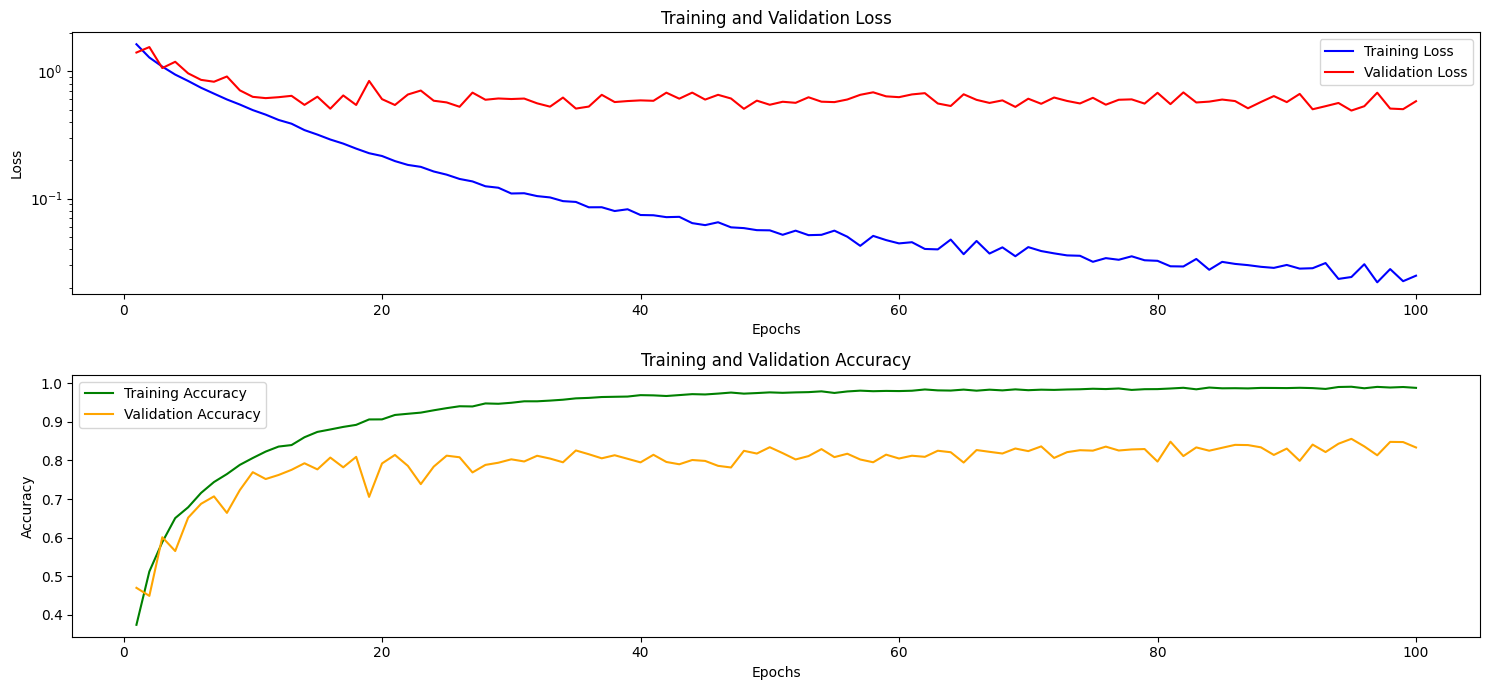

In [6]:
"""
Thanh Le  16 April 2024
How to train/fine-tune a pre-trained model on a custom dataset (i.e., transfer learning)
"""
import torch
from torch import nn, save, load
from tqdm import tqdm
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchmetrics.functional import accuracy
from torchvision.transforms import ToTensor, Resize
import numpy as np
import os
import matplotlib.pyplot as plt

# Setup CUDA
def setup_cuda():
    # Setting seeds for reproducibility
    seed = 50
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

    return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


def train_model():
    """
    Train the model over a single epoch
    :return: training loss and training accuracy
    """
    train_loss = 0.0
    train_acc = 0.0
    model.train()

    for (img, label) in tqdm(train_loader, ncols=80, desc='Training'):
        # Get a batch
        img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

        # Set the gradients to zero before starting backpropagation
        optimizer.zero_grad()

        # Perform a feed-forward pass
        logits = model(img)

        # Compute the batch loss
        loss = loss_fn(logits, label)

        # Compute gradient of the loss fn w.r.t the trainable weights
        loss.backward()

        # Update the trainable weights
        optimizer.step()

        # Accumulate the batch loss
        train_loss += loss.item()

        # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
        prediction = logits.argmax(axis=1)
        train_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

    return train_loss / len(train_loader), train_acc / len(train_loader)


def validate_model():
    """
    Validate the model over a single epoch
    :return: validation loss and validation accuracy
    """
    model.eval()
    valid_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():
        for (img, label) in tqdm(val_loader, ncols=80, desc='Valid'):
            # Get a batch
            img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

            # Perform a feed-forward pass
            logits = model(img)

            # Compute the batch loss
            loss = loss_fn(logits, label)

            # Accumulate the batch loss
            valid_loss += loss.item()

            # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
            prediction = logits.argmax(axis=1)
            val_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

    return valid_loss / len(val_loader), val_acc / len(val_loader)

# Example plotting function

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    # Losses
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.yscale('log')  # Log scale can help for loss curves with large values

    # Accuracies
    plt.subplot(2, 1, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    # Save the figure to a file
    plt.savefig("trainplot.png")  # You can change the file name and format (e.g., .png, .jpg, .pdf)

    plt.show()

if __name__ == "__main__":
    device = setup_cuda()

    # 1. Load the dataset
    transform = transforms.Compose([Resize((224, 224)), ToTensor()])
    train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
    val_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/val', transform=transform)
    # Get class names
    class_names = train_dataset.classes

    # 2. Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

    # 3. Create a new deep model without pre-trained weights
    # from utils.seresnet18 import SEResNet18

    model = SEResNet18(
        num_classes=len(class_names),
    ).to(device)

    # 4. Specify loss function and optimizer
    optimizer = Adam(model.parameters(), lr=1e-4)
    loss_fn = torch.nn.CrossEntropyLoss()

    # 5. Train the model with 100 epochs
    # store the metrics for plotting
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    max_acc = 0
    for epoch in range(100):

        # 5.1. Train the model over a single epoch
        train_loss, train_acc = train_model()
        train_losses.append(train_loss)  # save train loss values
        train_accuracies.append(train_acc)  # save train acc values

        # 5.2. Validate the model after training
        val_loss, val_acc = validate_model()
        val_losses.append(val_loss)  # save val loss values
        val_accuracies.append(val_acc)  # save val acc values

        print(f'Epoch {epoch}: Train loss = {train_loss}, Train accuracy: {train_acc}')
        print(f'Epoch {epoch}: Validation loss = {val_loss}, Validation accuracy: {val_acc}')

        # 4.3. Save the model if the validation accuracy is increasing
        if val_acc > max_acc:
            print(f'Validation accuracy increased ({max_acc} --> {val_acc}). Model saved')
            folder_path = 'checkpoints_se_resnet18'  # Define the folder name
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)  # Create the folder if it does not exist
            file_path = os.path.join(folder_path,
                                     'se_resnet18_epoch_' + str(epoch) + '_acc_{0:.4f}'.format(val_acc) + '.pt')
            with open(file_path, 'wb') as f:
                save(model.state_dict(), f)
            max_acc = val_acc
# After training is complete, plot the metrics
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Testing SEResnet18

In [7]:
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Thiết lập biến cần thiết
# train_dir = '/kaggle/input/playcards/train'
# test_dir = '/kaggle/input/playcards/test'
# valid_dir = '/kaggle/input/playcards/valid'
# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32
# IMG_SIZE = 224
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])
# patch_size = 16
# CLASS = {} # KHONG CAN DIEN CHI TIET


# # Thiết lập thiết bị (GPU hoặc CPU)
# def setup_cuda():
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#     return device


# device = setup_cuda()

# # Thiết lập các transform để xử lý ảnh
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])


# # Hàm dự đoán kết quả cho một hình ảnh
# def predict_image(image_path, model, transform, class_names, device):
#     model.eval()
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = transform(img).unsqueeze(0).to(device)
#     with torch.no_grad():
#         output = model(img_tensor)
#         _, predicted_class = torch.max(output, 1)
#     predicted_label = class_names[predicted_class.item()]
#     return img, predicted_label


# # Hàm chính để dự đoán các hình ảnh trong tập test
# def test_model():
#     # 1. Tải dữ liệu và lớp từ tập train
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     test_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/test', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Tạo mô hình ViT và tải trạng thái từ checkpoint
#     from utils.resnet18 import ResNet18

#     model = ResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     folder_checkpoint = 'checkpoints_se_resnet18'  # Define the folder name
#     file_name = 'se_resnet18_epoch_7_acc_0.8208.pt' #best weight
#     file_checkpoint = os.path.join(folder_checkpoint, file_name)  # lay best weight
#     model.load_state_dict(torch.load(file_checkpoint, device))
#     print('Model loaded from checkpoint.')
#     # Ensure the output directory exists
#     output_dir = "output_resnet18"
#     os.makedirs(output_dir, exist_ok=True)

#     # 3. Dự đoán kết quả cho mỗi hình ảnh trong tập test
#     for image_path in tqdm(test_dataset.imgs, desc='Testing'):
#         img, predicted_label = predict_image(image_path[0], model, manual_transforms, class_names, device)
#         # plt.imshow(img)
#         # plt.title(f'Predicted: {predicted_label}')
#         # plt.show()

#         # Convert the tensor image back to a PIL image if necessary
#         if isinstance(img, torch.Tensor):
#             img = transforms.ToPILImage()(img)

#         # Create a plot
#         fig, ax = plt.subplots()

#         # Set white background
#         fig.patch.set_facecolor('white')
#         ax.set_facecolor('white')

#         # Remove axis
#         ax.axis('off')

#         # Display the image
#         ax.imshow(img)

#         # Add the predicted label as the title
#         ax.set_title(f'Predicted: {predicted_label}', fontsize=12, pad=10)

#         # Save the figure
#         image_basename = os.path.basename(image_path[0])
#         image_name, image_ext = os.path.splitext(image_basename)
#         output_image_path = os.path.join(output_dir, f"{image_name}_pred_{predicted_label}.png")

#         plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
#         plt.close(fig)


# if __name__ == '__main__':
#     test_model()
